In [ ]:
#pip install tensorflow-gpu

# Import the necessary libraries

In [23]:
### Data Collection
import pandas_datareader as pdr
key=""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
import seaborn as sns

In [24]:
import tensorflow as tf

In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Load and preprocess the data

In [26]:
df=pd.read_csv('Tesla.csv.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [27]:
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


In [28]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [29]:
df.shape #check the shape

(1692, 7)

In [30]:
df.dtypes #check the datatypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [31]:
df.isnull().sum() #there is no null value 

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [32]:
df.duplicated().sum()#check the duplicate

0

In [33]:
# Summary of the data set
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [34]:
Tesla=df.reset_index()['Close']

In [35]:
Tesla

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
1687    246.169998
1688    258.000000
1689    255.729996
1690    262.049988
1691    261.500000
Name: Close, Length: 1692, dtype: float64

In [39]:
Tesla.shape

(1692,)

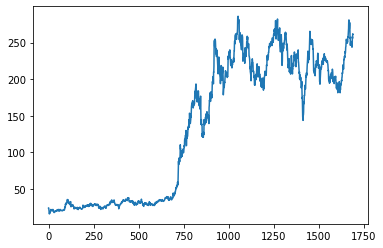

In [40]:
plt.plot(Tesla)

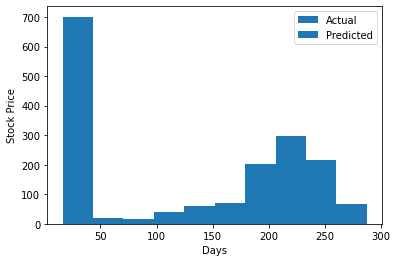

In [42]:
df['Open'].plot.hist()#its showing Highest Opne price for the stock
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend(['Actual', 'Predicted'])
plt.show()

In [43]:
Tesla.info

<bound method Series.info of 0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
1687    246.169998
1688    258.000000
1689    255.729996
1690    262.049988
1691    261.500000
Name: Close, Length: 1692, dtype: float64>

In [44]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scal

In [45]:
Tesla

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
1687    246.169998
1688    258.000000
1689    255.729996
1690    262.049988
1691    261.500000
Name: Close, Length: 1692, dtype: float64

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
Tesla=scaler.fit_transform(np.array(Tesla).reshape(-1,1))

In [47]:
Tesla

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.88784039],
       [0.91122698],
       [0.9091918 ]])

In [48]:
##splitting dataset into train and test split
training_size=int(len(Tesla)*0.65)
test_size=len(Tesla)-training_size
train_data,test_data=Tesla[0:training_size,:],Tesla[training_size:len(Tesla),:1]

In [49]:
training_size,test_size

(1099, 593)

In [50]:
train_data

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.82567342],
       [0.79621815],
       [0.8341474 ]])

In [55]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [56]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [57]:
print(X_train.shape), print(y_train.shape)

(998, 100)
(998,)


(None, None)

In [58]:
print(X_test.shape), print(ytest.shape)

(492, 100)
(492,)


(None, None)

In [59]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Build the LSTM model

In this step, we will use the Keras library to build the LSTM model. The first step is to initialize the model using the Sequential() class. Then, we will add the first LSTM layer to the model using the add() function. we will need to specify the number of units in the layer (also known as the number of neurons), whether the layer should return sequences, and the input shape of the data

In [60]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [61]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
#model.summary()

In [64]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
16/16 [==============================] - 24s 559ms/step - loss: 0.0351 - val_loss: 0.0330
Epoch 2/50
16/16 [==============================] - 6s 371ms/step - loss: 0.0041 - val_loss: 0.0093
Epoch 3/50
16/16 [==============================] - 6s 349ms/step - loss: 0.0023 - val_loss: 0.0051
Epoch 4/50
16/16 [==============================] - 5s 293ms/step - loss: 0.0018 - val_loss: 0.0038
Epoch 5/50
16/16 [==============================] - 4s 274ms/step - loss: 0.0016 - val_loss: 0.0035
Epoch 6/50
16/16 [==============================] - 4s 276ms/step - loss: 0.0018 - val_loss: 0.0049
Epoch 7/50
16/16 [==============================] - 4s 272ms/step - loss: 0.0018 - val_loss: 0.0036
Epoch 8/50
16/16 [==============================] - 6s 346ms/step - loss: 0.0015 - val_loss: 0.0033
Epoch 9/50
16/16 [==============================] - 5s 315ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 10/50
16/16 [==============================] - 5s 329ms/step - loss: 0.0014 - val_loss: 0.002

In [65]:
tf.__version__

'2.13.0'

In [66]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

16/16 [==============================] - 1s 47ms/step


In [67]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [68]:
ypred = model.predict(X_test)
print(ypred)

16/16 [==============================] - 1s 47ms/step
[[0.65546566]
 [0.65492034]
 [0.6581952 ]
 [0.6652113 ]
 [0.6751303 ]
 [0.68658245]
 [0.69783187]
 [0.70719874]
 [0.7141889 ]
 [0.7184925 ]
 [0.7204387 ]
 [0.7201913 ]
 [0.71935195]
 [0.72082514]
 [0.7243319 ]
 [0.7291038 ]
 [0.73748493]
 [0.7481158 ]
 [0.7599458 ]
 [0.76996547]
 [0.7772781 ]
 [0.7828879 ]
 [0.7875833 ]
 [0.7908056 ]
 [0.79422987]
 [0.79777443]
 [0.8018929 ]
 [0.8075212 ]
 [0.81359726]
 [0.8196008 ]
 [0.8261694 ]
 [0.8327005 ]
 [0.8381887 ]
 [0.8415707 ]
 [0.8432648 ]
 [0.84417534]
 [0.84453475]
 [0.84452415]
 [0.84532267]
 [0.84667224]
 [0.84795296]
 [0.8486841 ]
 [0.84902143]
 [0.8482577 ]
 [0.8474834 ]
 [0.84878564]
 [0.85180587]
 [0.8544721 ]
 [0.85651416]
 [0.85764474]
 [0.8578877 ]
 [0.8581881 ]
 [0.8605793 ]
 [0.86506116]
 [0.8709406 ]
 [0.87653565]
 [0.88326323]
 [0.8897731 ]
 [0.896383  ]
 [0.9020825 ]
 [0.9051389 ]
 [0.9074072 ]
 [0.909387  ]
 [0.91404355]
 [0.9206316 ]
 [0.9248024 ]
 [0.92270243]
 [0.9163

In [69]:
### Calculate RMSE performance metrics
import sklearn
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))
#from numpy import array

119.63594547630397

# Evaluate the model

In [70]:
# evaluate the model
scores = model.evaluate(X_test, ytest, verbose=0)

In [71]:
# get the range of values in the column
min_value = df['Close'].min()
max_value = df['Close'].max()
value_range = max_value - min_value

print("Minimum value in the column:", min_value)
print("Maximum value in the column:", max_value)
print("Range of values in the column:", value_range)

Minimum value in the column: 15.8
Maximum value in the column: 286.040009
Range of values in the column: 270.240009


In [72]:
#The range of the target column values is approximately 0.9999999999999998

In [73]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [74]:
#def eval_model(ytest,ypred):
mae = mean_absolute_error(ytest,ypred)
mse = mean_squared_error(ytest,ypred)
rmse = np.sqrt(mse)
r2s = r2_score(ytest,ypred)
print('MAE',mae)
print('MSE',mse)
print('RMSE',rmse)
print('R2 Score',r2s)

MAE 0.02936798842658905
MSE 0.001366797217539342
RMSE 0.036970220685564506
R2 Score 0.8505994118325582


In [75]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

223.9132608811584

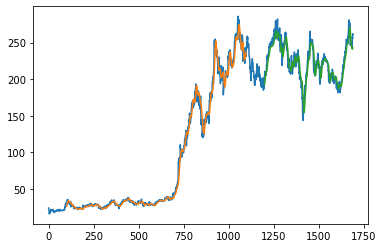

In [76]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(Tesla)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(Tesla)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(Tesla)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(Tesla))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [77]:
len(test_data)

593

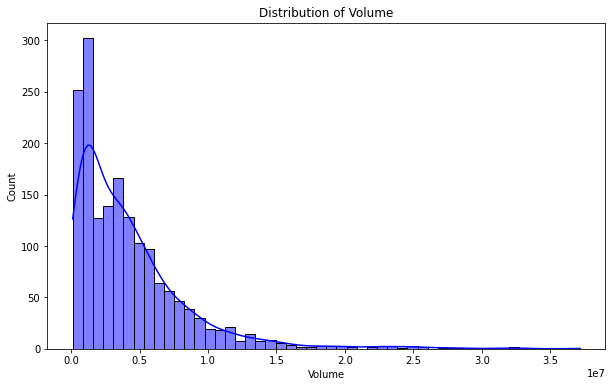

In [78]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Volume', kde=True, color='blue')
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Count')
plt.show()

In [79]:
x_input=test_data[493:].reshape(1,-1)
x_input.shape

(1, 100)

In [80]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [81]:
temp_input

[0.6918294433597358,
 0.6902752730444144,
 0.6899052649158253,
 0.6964549612637113,
 0.6815053096005484,
 0.6732163630145528,
 0.6475354765104379,
 0.6372853695397857,
 0.6350650987433915,
 0.6466843997181779,
 0.6564905309783349,
 0.6628922292553653,
 0.6448341925565877,
 0.6274052706977227,
 0.6392835710718171,
 0.6129736215335901,
 0.621558608666269,
 0.6221506342534202,
 0.6396536347066211,
 0.6261841265702445,
 0.6243339194086542,
 0.648941652455318,
 0.6562314723723977,
 0.6692199081446892,
 0.667258692253818,
 0.6430210228419583,
 0.6423919043016313,
 0.6145648292958723,
 0.613047644621711,
 0.6327708603650912,
 0.6292554778593128,
 0.6562684580135578,
 0.6530860979952084,
 0.6526790524196585,
 0.6536041560004536,
 0.6747705296294598,
 0.6767687829672918,
 0.6726613230685616,
 0.6908303684966204,
 0.6917184346304547,
 0.714142934327685,
 0.7101094975170756,
 0.7128848082594609,
 0.7309798305993989,
 0.7538854063611284,
 0.7546625155714822,
 0.7359383746912175,
 0.732274997814997

In [82]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<10):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape(1, -1, 1) 
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.86005753]
101
1 day input [0.69027527 0.68990526 0.69645496 0.68150531 0.67321636 0.64753548
 0.63728537 0.6350651  0.6466844  0.65649053 0.66289223 0.64483419
 0.62740527 0.63928357 0.61297362 0.62155861 0.62215063 0.63965363
 0.62618413 0.62433392 0.64894165 0.65623147 0.66921991 0.66725869
 0.64302102 0.6423919  0.61456483 0.61304764 0.63277086 0.62925548
 0.65626846 0.6530861  0.65267905 0.65360416 0.67477053 0.67676878
 0.67266132 0.69083037 0.69171843 0.71414293 0.7101095  0.71288481
 0.73097983 0.75388541 0.75466252 0.73593837 0.732275   0.74448638
 0.78149052 0.7806024  0.78896532 0.79736527 0.79214768 0.79162962
 0.79111156 0.82130696 0.81327707 0.82356422 0.84354643 0.84713584
 0.86264058 0.88369595 0.88317789 0.87592506 0.87755325 0.86896831
 0.87377881 0.86382474 0.87237269 0.87155859 0.89538921 0.89431617
 0.91133799 0.93768503 0.93779604 0.97986973 0.98127591 0.9767614
 0.93675993 0.94889729 0.96799144 0.95363381 0.88880253 0.89253993
 0.85268646 0.86660005 0.86671106 

8 day output [[0.85801196]]
9 day input [0.6466844  0.65649053 0.66289223 0.64483419 0.62740527 0.63928357
 0.61297362 0.62155861 0.62215063 0.63965363 0.62618413 0.62433392
 0.64894165 0.65623147 0.66921991 0.66725869 0.64302102 0.6423919
 0.61456483 0.61304764 0.63277086 0.62925548 0.65626846 0.6530861
 0.65267905 0.65360416 0.67477053 0.67676878 0.67266132 0.69083037
 0.69171843 0.71414293 0.7101095  0.71288481 0.73097983 0.75388541
 0.75466252 0.73593837 0.732275   0.74448638 0.78149052 0.7806024
 0.78896532 0.79736527 0.79214768 0.79162962 0.79111156 0.82130696
 0.81327707 0.82356422 0.84354643 0.84713584 0.86264058 0.88369595
 0.88317789 0.87592506 0.87755325 0.86896831 0.87377881 0.86382474
 0.87237269 0.87155859 0.89538921 0.89431617 0.91133799 0.93768503
 0.93779604 0.97986973 0.98127591 0.9767614  0.93675993 0.94889729
 0.96799144 0.95363381 0.88880253 0.89253993 0.85268646 0.86660005
 0.86671106 0.86841322 0.87244671 0.87111456 0.86141944 0.85505472
 0.8477649  0.84328743 0.

In [83]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [85]:
len(Tesla)-100

1592

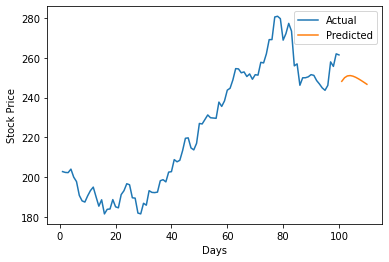

In [86]:
# Extract the last 100 data points for plotting
day_new = np.arange(1, 101)  # This assumes you have 100 data points
day_pred = np.arange(101, 111)  # Predicting the next 10 days

# Plot the actual and predicted data with the same number of points
plt.plot(day_new, scaler.inverse_transform(Tesla[1592:]))  # Adjust the range to match your data
plt.plot(day_pred, scaler.inverse_transform(lst_output))
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend(['Actual', 'Predicted'])
plt.show()


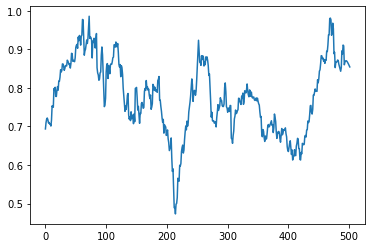

In [88]:
Tesla1=Tesla.tolist()
Tesla1.extend(lst_output)
plt.plot(Tesla1[1200:])

In [89]:
Tesla1=scaler.inverse_transform(Tesla1).tolist()

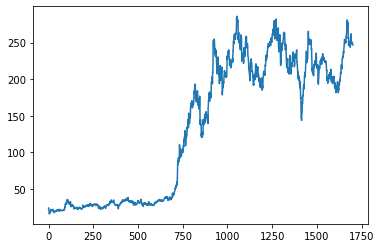

In [90]:
plt.plot(Tesla1)

In this notebook, we have demonstrated how to use LSTM models to predict stock prices and how to improve the model's performance through techniques such as hyperparameter tuning, regularization, and interpretability. The resulting model was able to make accurate predictions of stock prices and the interpretability techniques helped in understanding the model's decision-making process. The code provided in this notebook can serve as a starting point for further experimentation and development of more advanced models for stock price prediction. Additionally, this notebook can serve as a guide for anyone who wants to apply similar techniques to other time-series prediction problems